In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('50_startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.00,135426.92,0.00,California,42559.73
1,0.00,116983.80,45173.06,California,14681.40
2,542.05,51743.15,0.00,New York,35673.41
3,1000.23,124153.04,1903.93,New York,64926.08
4,1315.46,115816.21,297114.46,Florida,49490.75


In [4]:
X = data.iloc[:,:-1].values

In [5]:
X

array([[0.0, 135426.92, 0.0, 'California'],
       [0.0, 116983.8, 45173.06, 'California'],
       [542.05, 51743.15, 0.0, 'New York'],
       [1000.23, 124153.04, 1903.93, 'New York'],
       [1315.46, 115816.21, 297114.46, 'Florida'],
       [15505.73, 127382.3, 35534.17, 'New York'],
       [20229.59, 65947.93, 185265.1, 'New York'],
       [22177.74, 154806.14, 28334.72, 'California'],
       [23640.93, 96189.63, 148001.11, 'California'],
       [27892.92, 84710.77, 164470.71, 'Florida'],
       [28663.76, 127056.21, 201126.82, 'Florida'],
       [28754.33, 118546.05, 172795.67, 'California'],
       [38558.51, 82982.09, 174999.3, 'California'],
       [44069.95, 51283.14, 197029.42, 'California'],
       [46014.02, 85047.44, 205517.64, 'New York'],
       [46426.07, 157693.92, 210797.67, 'California'],
       [55493.95, 103057.49, 214634.81, 'Florida'],
       [61136.38, 152701.92, 88218.23, 'New York'],
       [61994.48, 115641.28, 91131.24, 'Florida'],
       [63408.86, 129219.6

In [6]:
type(X)

numpy.ndarray

In [7]:
Y = data.iloc[:, -1].values

In [8]:
Y

array([ 42559.73,  14681.4 ,  35673.41,  64926.08,  49490.75,  69758.98,
        81229.06,  65200.33,  71498.49,  77798.83,  90708.19,  78239.91,
        81005.76,  89949.14,  96479.51,  96712.8 ,  96778.92,  97483.56,
        99937.59,  97427.84, 107404.34, 101004.64, 103282.38, 108733.99,
       105008.31, 110352.25, 105733.54, 118474.03, 108552.04, 126992.93,
       111313.02, 122776.86, 124266.9 , 134307.35, 141585.52, 125370.37,
       144259.4 , 146121.95, 129917.04, 132602.65, 152211.77, 149759.96,
       155752.6 , 156991.12, 156122.51, 166187.94, 182901.99, 191050.39,
       191792.06, 192261.83])

In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
type(Y)

numpy.ndarray

In [11]:
data.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

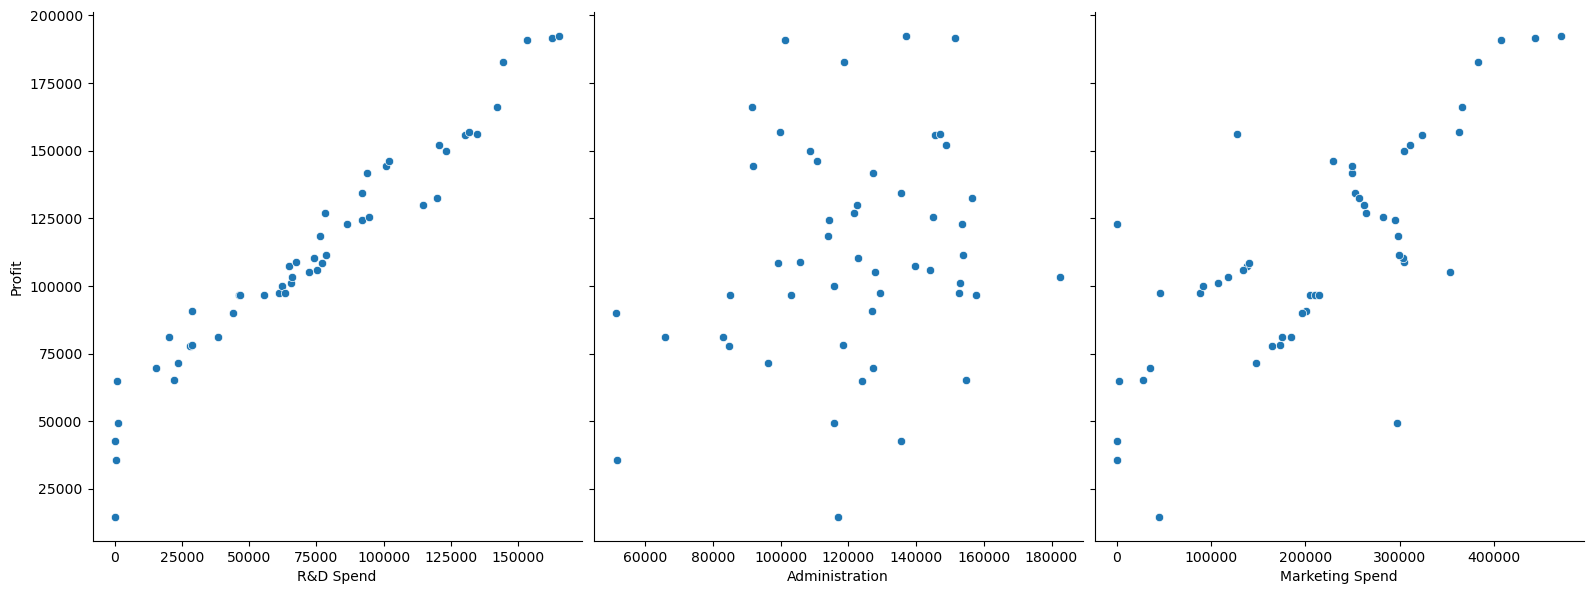

In [12]:
p = sns.pairplot(data, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars=['Profit'], size=6, aspect=0.9)
plt.show()

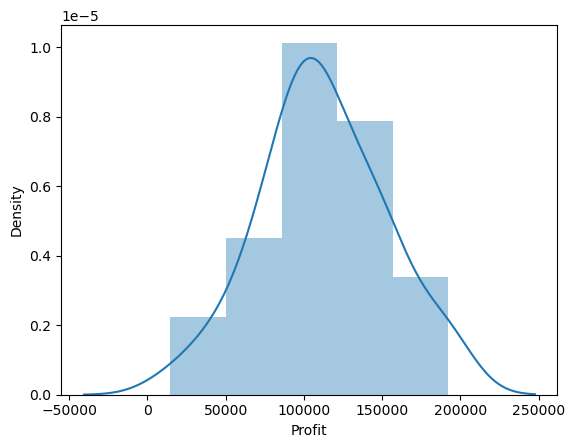

In [13]:
sns.distplot(data['Profit'], bins=5)
plt.show()

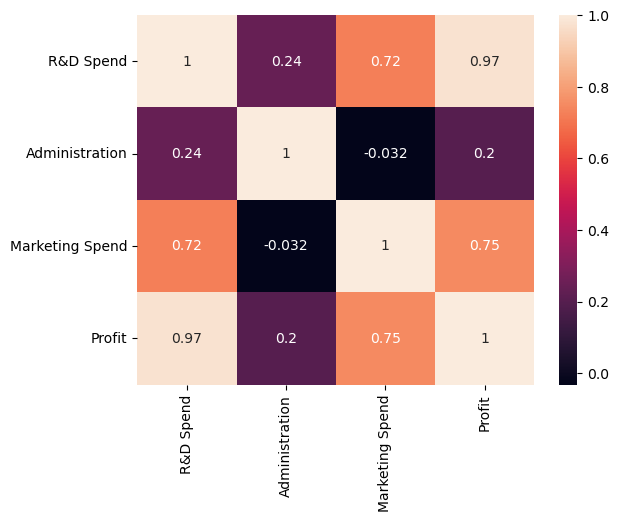

In [14]:
sns.heatmap(data.corr(), annot=True)
plt.show()

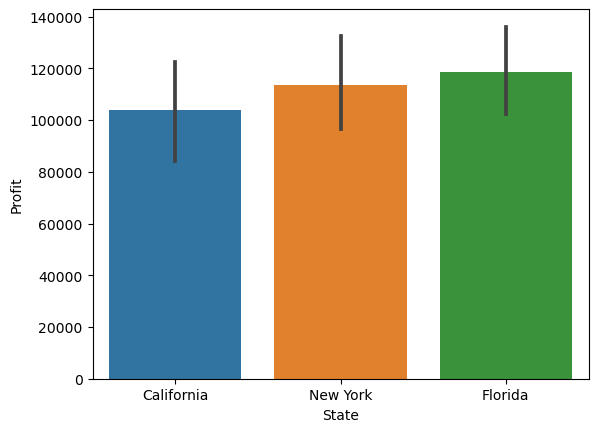

In [15]:
sns.barplot(x='State', y='Profit', data=data)
plt.show()

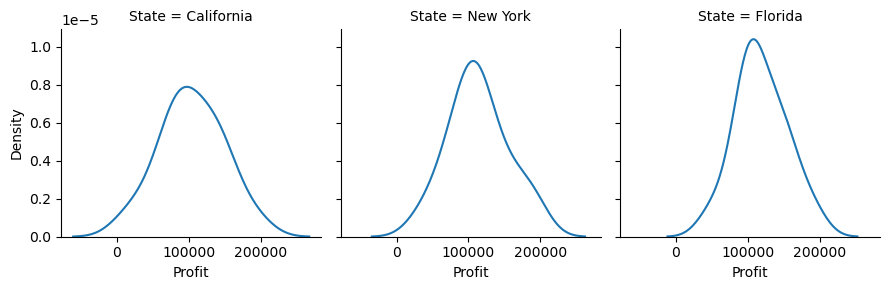

In [16]:
g = sns.FacetGrid(data, col='State')
g = g.map(sns.kdeplot, 'Profit')
plt.show()

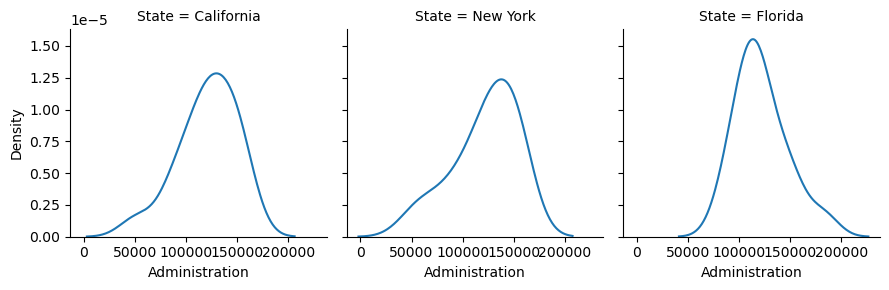

In [17]:
g = sns.FacetGrid(data, col='State')
g = g.map(sns.kdeplot, 'Administration')
plt.show()

In [18]:
data['Profit'].skew()

0.02329101976911791

In [19]:
data['Administration'].skew()

-0.4890248099671752

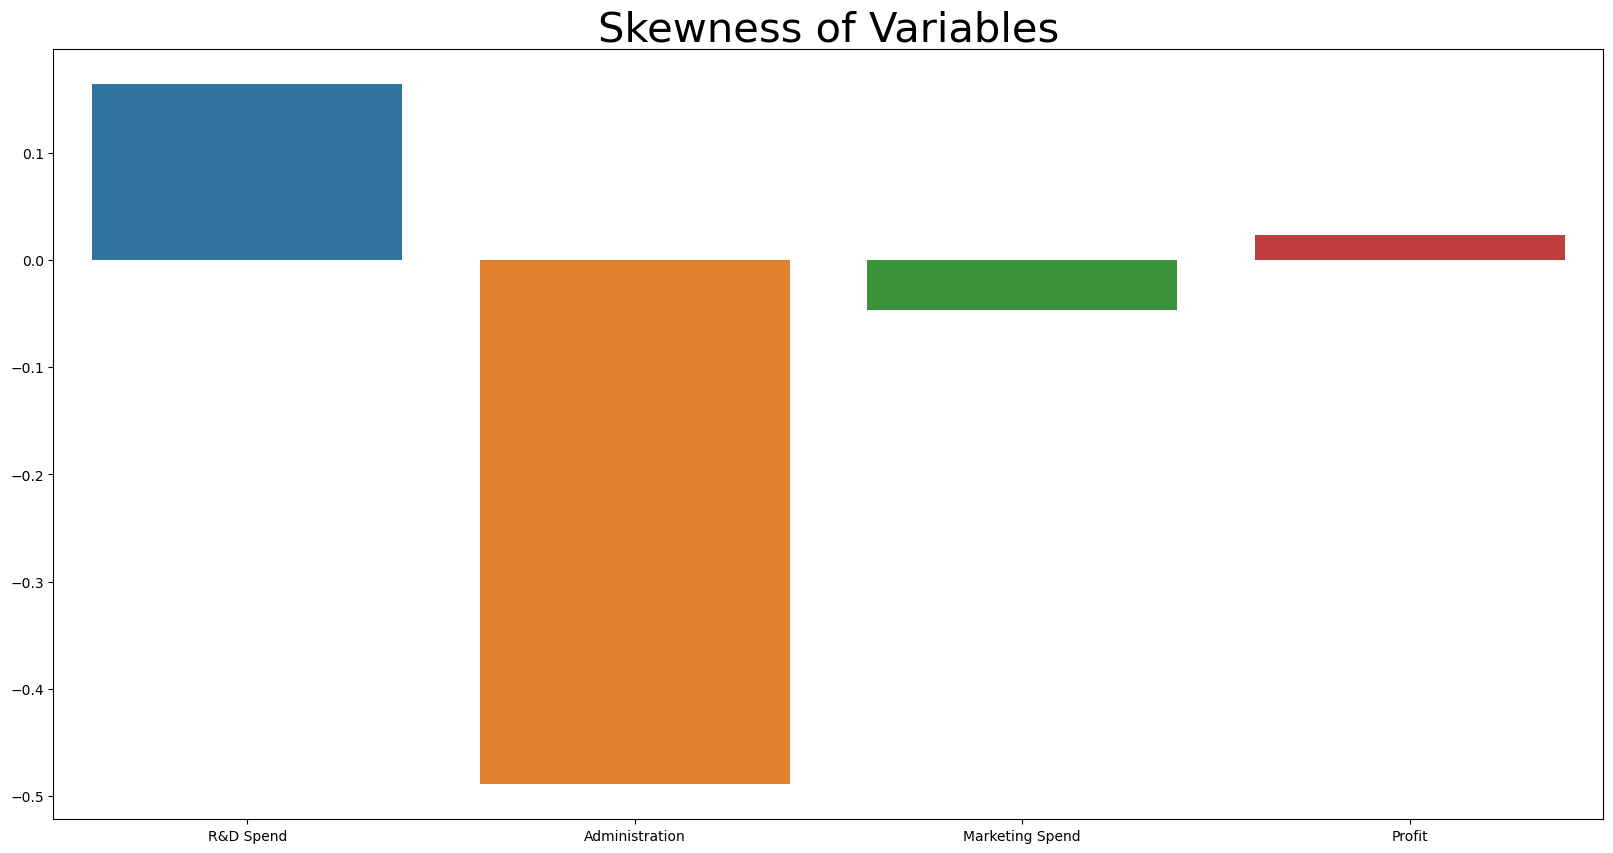

In [20]:
plt.figure(figsize=(20,10))
sk = {}
for col in data.columns:
    if col != 'State':
        skewness = data[col].skew()
        sk[col] = skewness
        
sns.barplot(x=list(sk.keys()), y=list(sk.values()))
plt.title('Skewness of Variables', fontsize=30)
plt.show()

In [21]:
data['State'].nunique()

3

In [22]:
data['State'].unique()

array(['California', 'New York', 'Florida'], dtype=object)

In [23]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[1.0, 0.0, 0.0, 0.0, 135426.92, 0.0],
       [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.06],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [1.0, 0.0, 0.0, 22177.74, 154806.14, 28334.72],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 28663.76, 127056.21, 201126.82],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [1.0, 0.0, 0.0, 44069.95, 51283.14, 197029.42],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 61994.48, 11

In [25]:
X

array([[1.0, 0.0, 0.0, 0.0, 135426.92, 0.0],
       [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.06],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [1.0, 0.0, 0.0, 22177.74, 154806.14, 28334.72],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 28663.76, 127056.21, 201126.82],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [1.0, 0.0, 0.0, 44069.95, 51283.14, 197029.42],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 61994.48, 11

In [26]:
Y

array([ 42559.73,  14681.4 ,  35673.41,  64926.08,  49490.75,  69758.98,
        81229.06,  65200.33,  71498.49,  77798.83,  90708.19,  78239.91,
        81005.76,  89949.14,  96479.51,  96712.8 ,  96778.92,  97483.56,
        99937.59,  97427.84, 107404.34, 101004.64, 103282.38, 108733.99,
       105008.31, 110352.25, 105733.54, 118474.03, 108552.04, 126992.93,
       111313.02, 122776.86, 124266.9 , 134307.35, 141585.52, 125370.37,
       144259.4 , 146121.95, 129917.04, 132602.65, 152211.77, 149759.96,
       155752.6 , 156991.12, 156122.51, 166187.94, 182901.99, 191050.39,
       191792.06, 192261.83])

In [27]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.00,135426.92,0.00,California,42559.73
1,0.00,116983.80,45173.06,California,14681.40
2,542.05,51743.15,0.00,New York,35673.41
3,1000.23,124153.04,1903.93,New York,64926.08
4,1315.46,115816.21,297114.46,Florida,49490.75


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0 )

In [29]:
print(X_train)
print(Y_train)

[[1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [0.0 0.0 1.0 120542.52 148718.95 311613

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [31]:
regressor.coef_

array([-5.54608471e+02, -1.58299487e+03,  2.13760335e+03,  8.52435245e-01,
       -1.10218787e-01,  1.23886231e-02])

In [32]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(Y_pred)

[118980.86  73400.66  71708.07 156749.57  57265.96 115965.96 149859.3
 119254.03  96423.73  50823.43]


In [33]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)), 1))

[[118980.86 108552.04]
 [ 73400.66  78239.91]
 [ 71708.07  90708.19]
 [156749.57 149759.96]
 [ 57265.96  35673.41]
 [115965.96 118474.03]
 [149859.3  129917.04]
 [119254.03 122776.86]
 [ 96423.73 103282.38]
 [ 50823.43  49490.75]]


In [34]:
import sklearn.metrics as metrics

def regression_result(Y_test, Y_pred): 
    explained_variance = metrics.explained_variance_score(Y_test, Y_pred)
    MAE = metrics.mean_absolute_error(Y_test, Y_pred)
    MSE = metrics.mean_squared_error(Y_test, Y_pred)
    MSLE = metrics.mean_squared_log_error(Y_test, Y_pred)
    MAE1 = metrics.median_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)
    MAPE = metrics.mean_absolute_percentage_error(Y_test, Y_pred)
    
    print('Explained Variance = ', round(explained_variance,4))
    print('Mean Absolute Error = ', round(MAE, 4))
    print('Mean Squared Error = ', round(MSE, 4))
    print('Mean Squared Log Error = ', round(MSLE, 4))
    print('Median Absolute Error = ', round(MAE1, 4))
    print('R2 = ', round(r2, 4))
    print('Mean Absolute Percentage Error = ', round(MAPE, 4))
    
    
    

In [35]:
regressor.score(X_test, Y_test)

0.8723896986726853

In [36]:
regressor.score(X_train, Y_train)

0.9564838566932254

In [37]:
regressor.score(X_test, Y_pred)

1.0

In [38]:
regression_result(Y_test, Y_pred)

Explained Variance =  0.8772
Mean Absolute Error =  9701.4836
Mean Squared Error =  147348750.3376
Mean Squared Log Error =  0.0321
Median Absolute Error =  6924.128
R2 =  0.8724
Mean Absolute Percentage Error =  0.1316


In [39]:
residual = Y_test - Y_pred
#print('Residual = ', residual)
mean_residual = np.mean(residual)
print('Mean of Residual = ', mean_residual)

Mean of Residual =  -2355.700057301955


In [40]:
Y_pred

array([118980.86,  73400.66,  71708.07, 156749.57,  57265.96, 115965.96,
       149859.3 , 119254.03,  96423.73,  50823.43])

In [41]:
Y_test

array([108552.04,  78239.91,  90708.19, 149759.96,  35673.41, 118474.03,
       129917.04, 122776.86, 103282.38,  49490.75])

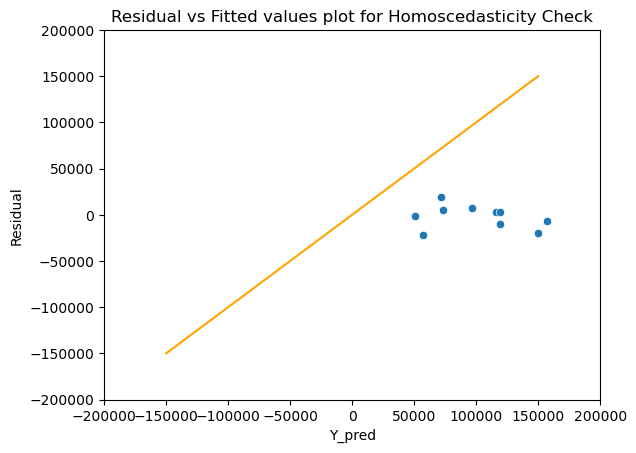

In [42]:
p = sns.scatterplot(Y_pred, residual)
plt.xlabel('Y_pred')
plt.ylabel('Residual')
plt.xlim(-200000, 200000)
plt.ylim(-200000, 200000)
p = sns.lineplot([-150000, 150000], [-150000, 150000], color='orange')
p= plt.title('Residual vs Fitted values plot for Homoscedasticity Check')
plt.show()

In [43]:
#from scipy.stats import bartlett
#test = bartlett (X_train,residual)
#print(test)

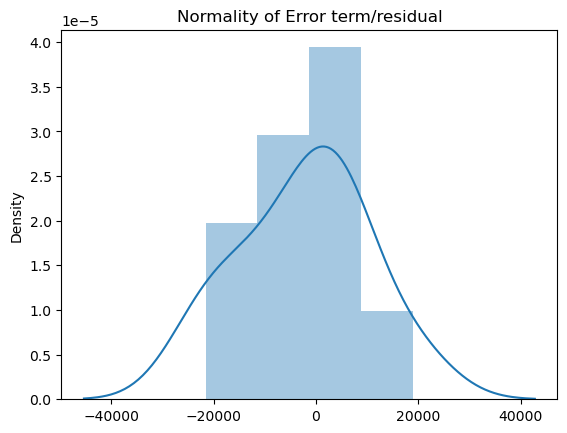

In [44]:
p = sns.distplot(residual, kde=True)
p = plt.title('Normality of Error term/residual')
plt.show()